<a href="https://colab.research.google.com/github/SambhavVinay/Smiling_NotSmiling_CNNModel/blob/main/Smiling_NotSmiling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os, zipfile

In [2]:
with zipfile.ZipFile("face.zip",'r') as r_zip:
  r_zip.extractall(".")

In [3]:
base_dir = os.path.join("/content",'face')
train_dir = "/content/train"
test_dir = "/content/test"

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
size = (150,150)

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=size,
    batch_size=20,
    class_mode='binary'
)
test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=size,
    batch_size=20,
    class_mode='binary'
)

Found 164 images belonging to 2 classes.
Found 164 images belonging to 2 classes.


In [7]:
from tensorflow.keras import models, layers

In [10]:
model = models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(256,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     9,470,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,563,713 (36.48 MB)

 Trainable params: 9,563,713 (36.48 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(
    train_gen,
    epochs=20,
    validation_data = test_gen
)

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 420ms/step - accuracy: 0.9291 - loss: 0.2930 - val_accuracy: 0.8963 - val_loss: 0.2564
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 389ms/step - accuracy: 0.8669 - loss: 0.2833 - val_accuracy: 0.8841 - val_loss: 0.2422
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 524ms/step - accuracy: 0.9029 - loss: 0.2437 - val_accuracy: 0.9390 - val_loss: 0.1462
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 399ms/step - accuracy: 0.9271 - loss: 0.1502 - val_accuracy: 0.9756 - val_loss: 0.0798
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 385ms/step - accuracy: 0.9758 - loss: 0.1109 - val_accuracy: 0.9817 - val_loss: 0.0518
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 524ms/step - accuracy: 0.9912 - loss: 0.0604 - val_accuracy: 0.9817 - val_loss: 0.0831
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 424ms/step - accuracy: 0.9708 - loss: 0.0875 - val_accuracy: 0.9573 - val_loss: 0.1655
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 378ms/step - accuracy: 0.9627 - loss: 0.1410 - val_accuracy: 0.9939 - val_loss:

Saving OIP (3).webp to OIP (3).webp
Saving OIP (2).webp to OIP (2).webp
Saving OIP (1).webp to OIP (1) (2).webp
Saving OIP.jpg to OIP (2).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


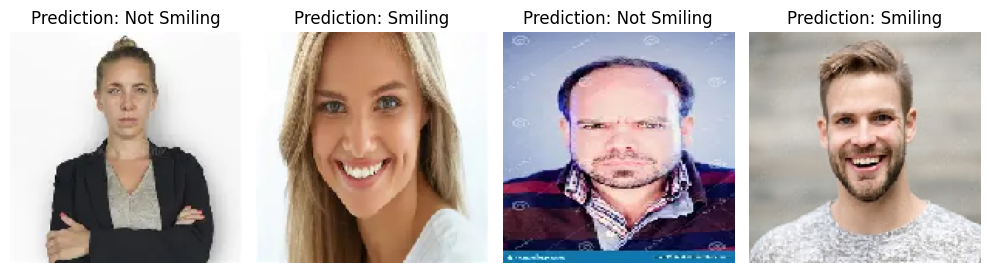

In [19]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt


uploaded = files.upload()


plt.figure(figsize=(10, 5))

for i, fn in enumerate(uploaded.keys()):

    img = image.load_img(fn, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0


    pred = model.predict(img_array)[0][0]
    label = "Not Smiling" if pred > 0.5 else "Smiling"


    plt.subplot(1, len(uploaded), i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Prediction: {label}")

plt.tight_layout()
plt.show()
